C:\Users\Meet\AppData\Local\Temp\ipykernel_23344\4271028913.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  H[i] = z_val / (z_val - 1)
C:\Users\Meet\AppData\Local\Temp\ipykernel_23344\4271028913.py:15: RuntimeWarning: invalid value encountered in scalar divide
  H[i] = z_val / (z_val - 1)


Z-Transform of unit step: H(z) = z/(z-1)
Pole at z = 1
Zero at z = 0
Pole magnitude: 1
System is: Unstable


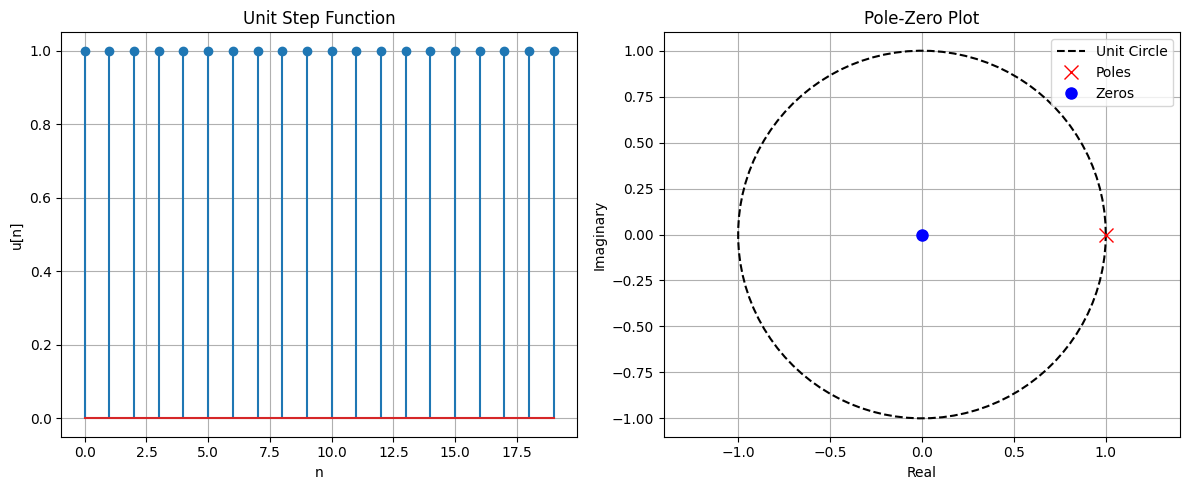

In [1]:
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt

def z_transform_unit_step(num_points=100):
    n = np.arange(0, num_points)
    u = np.ones(num_points)
    
    z = np.exp(1j * np.linspace(0, 2*np.pi, 1000))
    H = np.zeros(len(z), dtype=complex)
    
    for i, z_val in enumerate(z):
        if abs(z_val) > 1e-10:
            H[i] = z_val / (z_val - 1)
    
    poles = [1]
    zeros = [0]
    
    pole_magnitude = np.abs(poles[0])
    
    if pole_magnitude >= 1:
        stability = "Unstable"
    else:
        stability = "Stable"
    
    print(f"Z-Transform of unit step: H(z) = z/(z-1)")
    print(f"Pole at z = {poles[0]}")
    print(f"Zero at z = {zeros[0]}")
    print(f"Pole magnitude: {pole_magnitude}")
    print(f"System is: {stability}")
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.stem(n[:20], u[:20])
    ax1.set_xlabel('n')
    ax1.set_ylabel('u[n]')
    ax1.set_title('Unit Step Function')
    ax1.grid(True)
    
    theta = np.linspace(0, 2*np.pi, 100)
    ax2.plot(np.cos(theta), np.sin(theta), 'k--', label='Unit Circle')
    ax2.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Poles')
    ax2.plot(np.real(zeros), np.imag(zeros), 'bo', markersize=8, label='Zeros')
    ax2.set_xlabel('Real')
    ax2.set_ylabel('Imaginary')
    ax2.set_title('Pole-Zero Plot')
    ax2.grid(True)
    ax2.axis('equal')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return H, poles, zeros, stability

H, poles, zeros, stability = z_transform_unit_step()

Zeros: [0.9 0.7]
Poles: [0.6 0.4]
System is STABLE


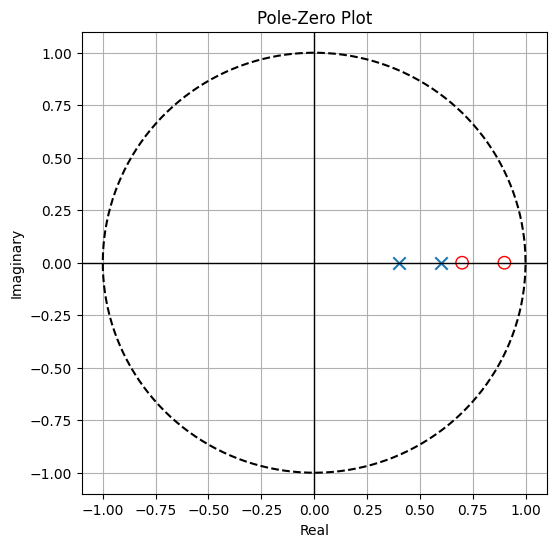

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

num = 0.5 * np.poly([0.7, 0.9])
den = np.poly([0.6, 0.4])

system = signal.dlti(num, den)

zeros, poles = system.zeros, system.poles

print("Zeros:", zeros)
print("Poles:", poles)

stable = np.all(np.abs(poles) < 1)

if stable:
    print("System is STABLE")
else:
    print("System is UNSTABLE")

plt.figure(figsize=(6,6))
theta = np.linspace(0, 2*np.pi, 500)
plt.plot(np.cos(theta), np.sin(theta), 'k--')

plt.scatter(np.real(poles), np.imag(poles), marker='x', s=80)
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', s=80, facecolors='none', edgecolors='r')

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Plot')
plt.grid(True)
plt.show()
